<a href="https://colab.research.google.com/github/qzzt1n4/Basys3_LogicGateLab/blob/main/Basys3_LogicGate_Grp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("[INFO]: Init the Verilog ENV")
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

[INFO]: Init the Verilog ENV


# T01: Basic Logic Gates on Basys 3

---



## Digital Systems Lab Group 4
Ho Wei Rui 1007205

Lai Si Yuan 1007210

Lim Chun Yang Samuel 1007206

Qistina Binte Mohd Sahril 1007216

## Objectives:


Design and implement basic logic gates (NOT, AND, OR, XOR, NAND, NOR, XNOR) on the Basys 3 FPGA board using Verilog. Use switches `sw[0]` and `sw[1]` as inputs and LEDs `led[7:0]` to display the output of each gate. Demonstrate the input-output relationship using a truth table.

#Design Steps:

1. Create a new Vivado Project and add Basys3 Board
2. Create Constraint File - Select input and outputs to be used (Switches & LEDs)
3. Create Design Source - For module verilog code
4. Create Simulation File - For testbench Code (Set sim file as top)
5. Run simulation
6. Run Synthesis -> Run Implementation -> Generate Bitstream
7. Program Device (Basys3 Board)

# Module Verilog Code

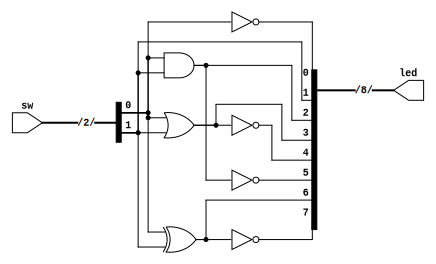

In [4]:
%%print_verilog
module top_module(

input [1:0] sw,
output [7:0] led

    );

    assign led[0] = ~sw[0];  //NOT A
    assign led[1] = ~(~sw[1]);  //BUFF B
    assign led[2] = sw[0] & sw[1];  //AND
    assign led[3] = sw[0] | sw[1];  //OR
    assign led[4] = ~(sw[0] | sw[1]);  //NOR
    assign led[5] = ~(sw[0] & sw[1]);  //NAND
    assign led[6] = sw[0] ^ sw[1];  //XOR
    assign led[7] = ~(sw[0]^sw[1]);  //XNOR

endmodule

# Testbench Code

In [5]:
%%verilog
module top_module(

input [1:0] sw,
output [7:0] led

    );

    assign led[0] = ~sw[0];
    assign led[1] = ~(~sw[1]);
    assign led[2] = sw[0] & sw[1];
    assign led[3] = sw[0] | sw[1];
    assign led[4] = ~(sw[0] | sw[1]);
    assign led[5] = ~(sw[0] & sw[1]);
    assign led[6] = sw[0] ^ sw[1];
    assign led[7] = ~(sw[0]^sw[1]);

endmodule

//----TESTBENCH----
module tb1;

reg [1:0] sw;
wire [7:0] led;

top_module uut (sw, led);

initial begin

    $dumpfile("tb1.vcd");
    $dumpvars;

    sw = 2'b00;
    #5 sw = 2'b01;
    #5 sw = 2'b10;
    #5 sw = 2'b11;
    #5 $finish();
    $dumpoff;

end

endmodule

VCD info: dumpfile tb1.vcd opened for output.



#Simulation
###Waveform Generation

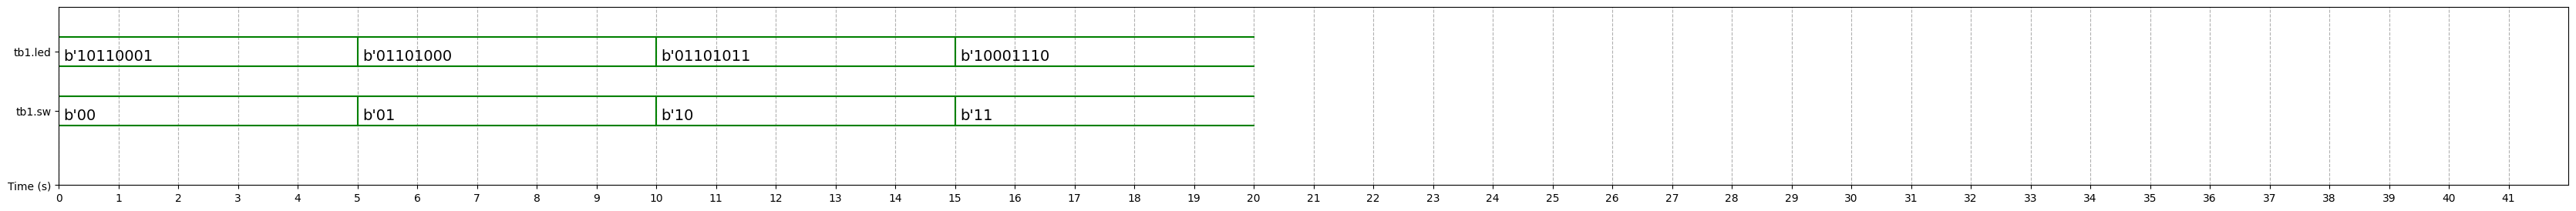

In [ ]:
%%waveform tb1.vcd
sign_list = ['tb1.led','tb1.sw']
time_begin = 0
time_end = 41
base = 'bin'

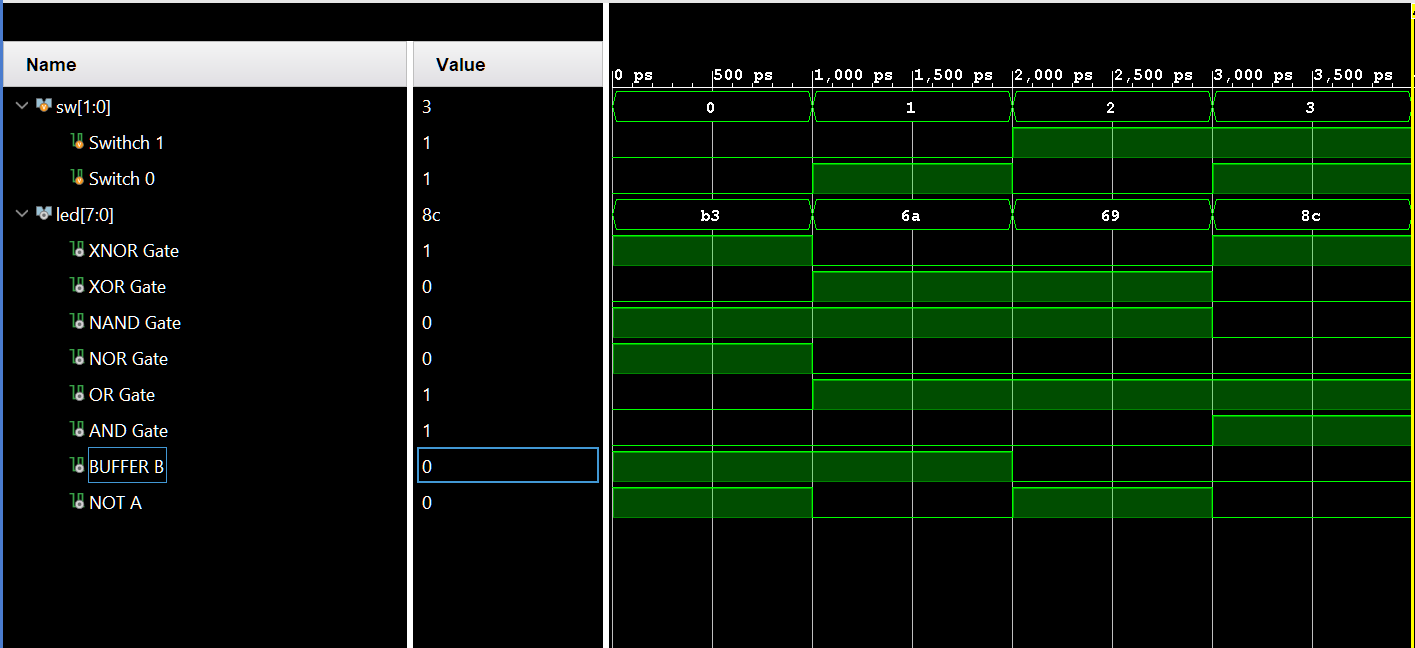

# DEMO Screenshots


LEDs updating as switches sw[0] and sw[1] toggle. Output should tally with the truth table below:

**Truth Table**:

| sw[1] (B) | sw[0] (A) | NOT A (led[0]) | BUF B (led[1]) | AND (led[2]) | OR (led[3]) | NOR (led[4]) | NAND (led[5]) | XOR (led[6]) | XNOR (led[7]) |
|:---------:|:---------:|:--------------:|:--------------:|:-----------:|:----------:|:-----------:|:------------:|:-----------:|:------------:|
| 0         | 0         | 1              | 0              | 0           | 0          | 1           | 1            | 0           | 1            |
| 0         | 1         | 0              | 0              | 0           | 1          | 0           | 1            | 1           | 0            |
| 1         | 0         | 1              | 1              | 0           | 1          | 0           | 1            | 1           | 0            |
| 1         | 1         | 0              | 1              | 1           | 1          | 0           | 0            | 0           | 1            |


### SW[1:0] = 2'b00

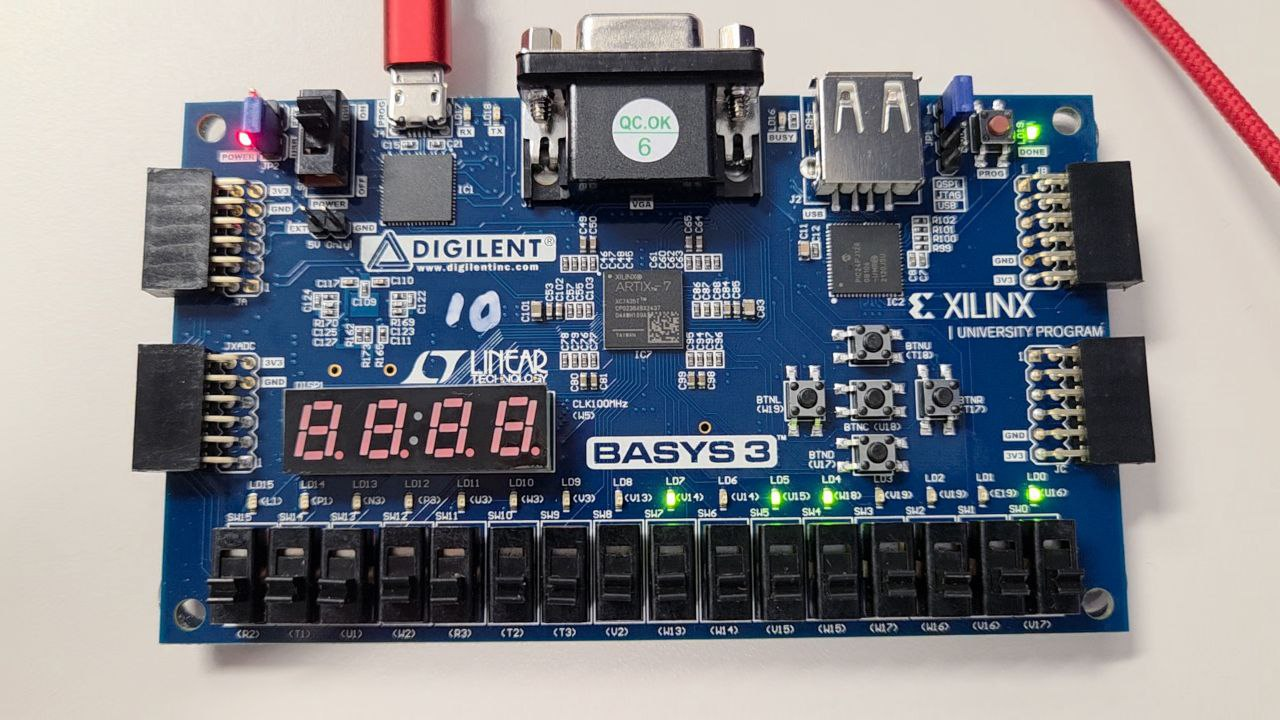

### SW[1:0] = 2'b01

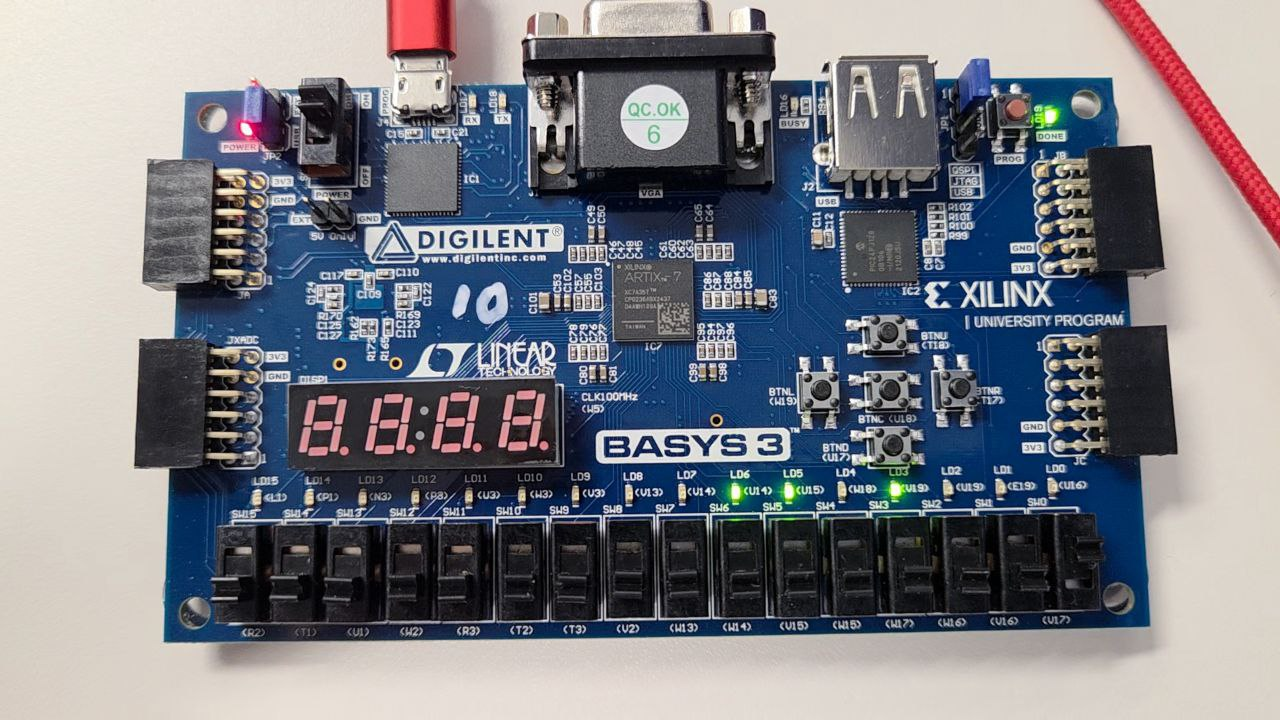

### SW[1:0] = 2'b10

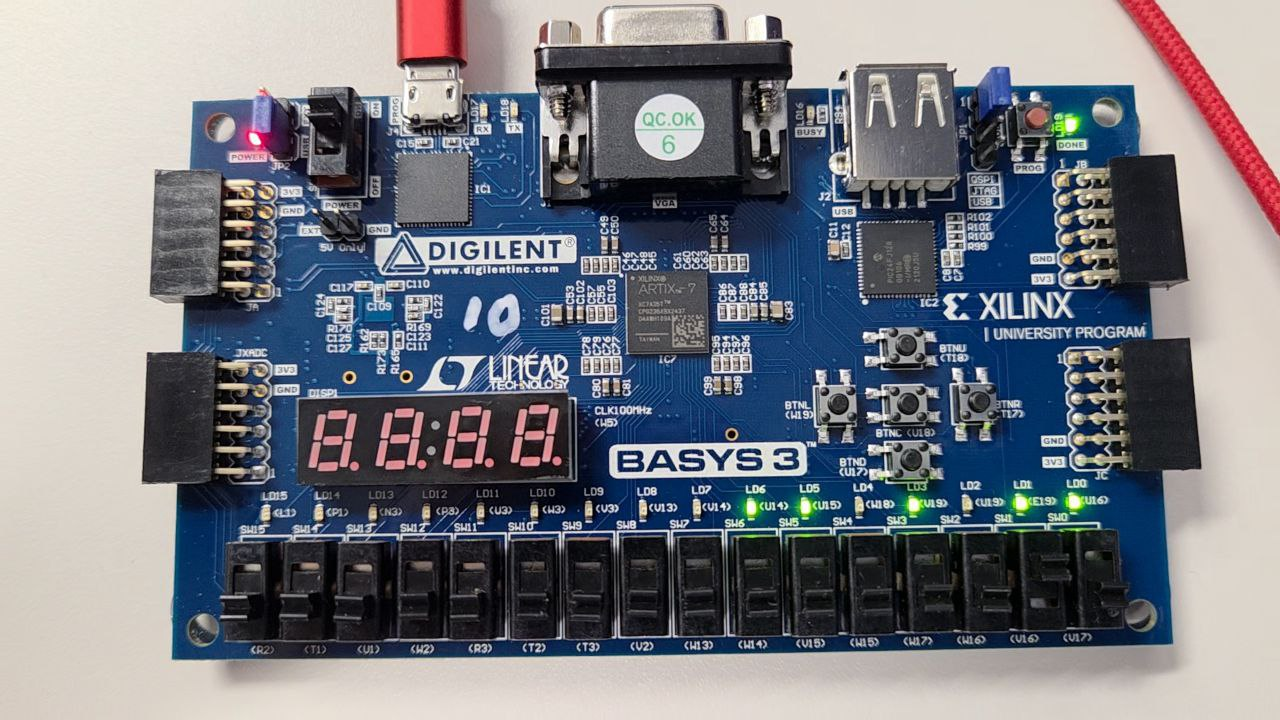

### SW[1:0] = 2'b11

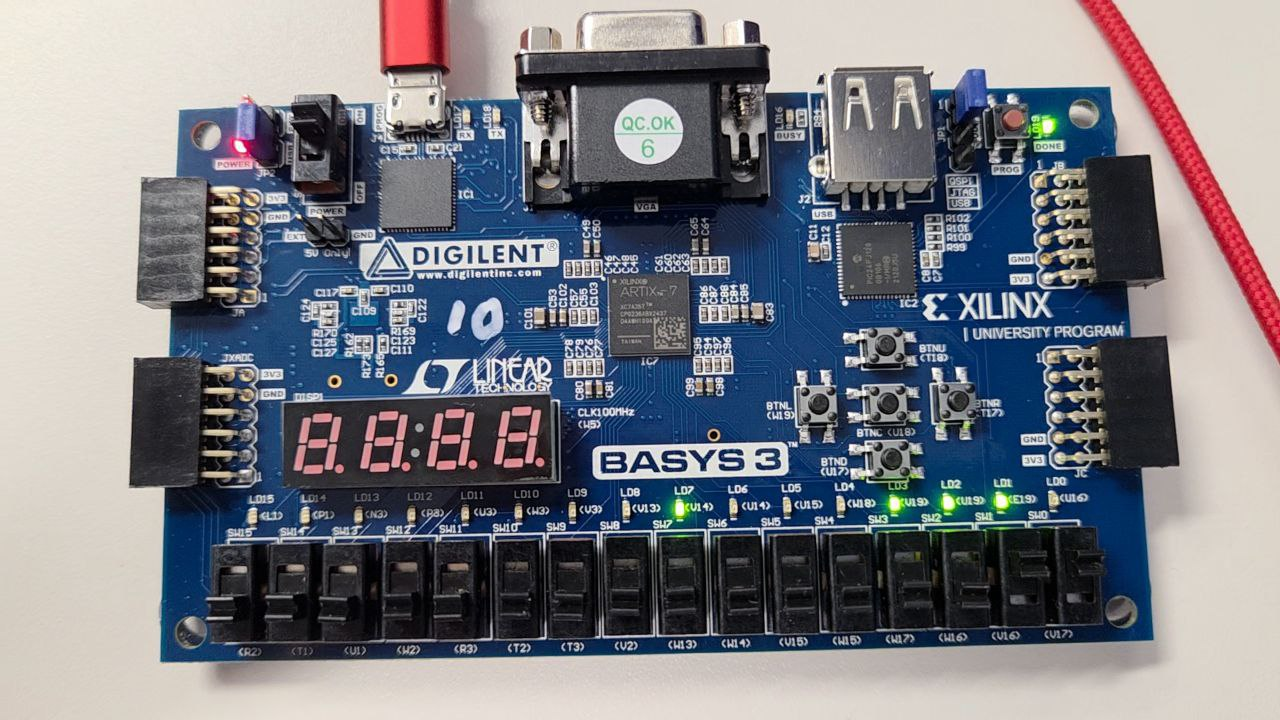

# Challenges

1. Setting up a new project in Vivado (selecting the appropriate board and settings)
2. Editing the Constraint File according to the inputs and outputs needed
3. Understanding and rectifying the code errors that appear whilst coding
4. Setting the correct file as top
5. Understanding the difference between coding in Verilog in Collab and in Vivado (specifically functions such as %%verilog and $dumpfile)
6. Converting the working code in Vivado to run in Collab as well

#Lessons Learned:

1. Ensure to deactivate security software to allow program to run properly
2. Use a micro USB cable that is not expensive (expensive/branded cables tend to have more hidden protocols causing it to not work with the board)
3. Adjust the timing of the waveform generation to be able to see the simulation outputs clearly